In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from deel.lip.layers import SpectralDense
print("Library Versions:")
print('numpy:',np.__version__)
print('pandas:',pd.__version__)
print('tensorflow:',tf.__version__)

Library Versions:
numpy: 1.24.3
pandas: 2.1.1
tensorflow: 2.13.1


In [3]:
n_epochs = 200
verbose_option = True

# Classification for Ship Detection


Load Ship Detection Dataset

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

ROOT_PATH = "shipsnet"
BATCH_SIZE=1000
def normalize_img(image, label):
    return (tf.cast(image, tf.float32) / 255.0, label)

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
train_dataset, test_dataset = tf.keras.utils.image_dataset_from_directory(ROOT_PATH,
                            labels = 'inferred',
                            label_mode = 'categorical',
                            class_names = None,
                            color_mode = "rgb",
                            batch_size = BATCH_SIZE,
                            image_size = (80, 80),
                            shuffle = True,
                            seed = 42,
                            subset="both",
                            validation_split = 0.2,
)

train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.cache()
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache()
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Using 800 files for validation.


2023-10-27 19:09:03.827558: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46497 MB memory:  -> device: 0, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:1a:00.0, compute capability: 8.9
2023-10-27 19:09:03.828757: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46497 MB memory:  -> device: 1, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:1c:00.0, compute capability: 8.9
2023-10-27 19:09:03.830130: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 46497 MB memory:  -> device: 2, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:1d:00.0, compute capability: 8.9
2023-10-27 19:09:03.831376: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 46497 MB memory:  -> device: 3, name: NV

In [6]:
x_train, y_train = list(train_dataset.as_numpy_iterator())[0]
x_test, y_test = list(test_dataset.as_numpy_iterator())[0]

Using Tensoflow, perform  non-linear binary classification model for the classification dataset.

In [7]:
def build_model():
    inputs = layers.Input(shape=(80,80,3))
    flat = layers.Flatten()(inputs)
    h1 = layers.Dense(50, activation="relu")(flat) #TODO: Call a Keras Tensorflow Dense layer constructor for 50 ReLU neurons and call it on the flattened input
    h2 = layers.Dense(50, activation="relu")(h1) #TODO: Call a Keras Tensorflow Dense layer constructor for 50 ReLU neurons and call it on h1
    h3 = layers.Dense(50, activation="relu")(h2) #TODO: Call a Keras Tensorflow Dense layer constructor for 50 ReLU neurons and call it on h2
    p = layers.Dense(2,activation=tf.keras.activations.softmax)(h3) #TODO: Call the Dense layer constructor to compute the prediction for p(y=1|x,theta)

    model = keras.Model(inputs=inputs, outputs=p)

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        optimizer=tf.keras.optimizers.Adam(1e-3),
        metrics=[tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.CategoricalCrossentropy(from_logits=False)]
    )
    return model

In [8]:
model = build_model()

In [9]:
model.fit(train_dataset, epochs=n_epochs, verbose=True)#verbose_option)

Epoch 1/200


2023-10-27 19:09:13.986207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-27 19:09:14.001933: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fdf40013380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-27 19:09:14.001967: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
2023-10-27 19:09:14.001975: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
2023-10-27 19:09:14.001981: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
2023-10-27 19:09:14.001987: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (3): NVIDIA RTX 6000 Ada Generation,

4/4 [==============================] - 4s 20ms/step - loss: 0.9309 - categorical_accuracy: 0.4403 - categorical_crossentropy: 0.9309
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 0.6127 - categorical_accuracy: 0.7575 - categorical_crossentropy: 0.6127
Epoch 3/200
4/4 [==============================] - 0s 18ms/step - loss: 0.5104 - categorical_accuracy: 0.7603 - categorical_crossentropy: 0.5104
Epoch 4/200
4/4 [==============================] - 0s 17ms/step - loss: 0.5037 - categorical_accuracy: 0.7922 - categorical_crossentropy: 0.5037
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 0.6072 - categorical_accuracy: 0.6762 - categorical_crossentropy: 0.6072
Epoch 6/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5259 - categorical_accuracy: 0.7600 - categorical_crossentropy: 0.5259
Epoch 7/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4604 - categorical_accuracy: 0.8106 - categorical_crossentropy: 0.46

Evaluate the classification model on the test data

In [10]:
model.evaluate(test_dataset.take(-1))

1/1 [==============================] - 0s 215ms/step - loss: 0.1384 - categorical_accuracy: 0.9450 - categorical_crossentropy: 0.1384


[0.13842110335826874, 0.9449999928474426, 0.13842110335826874]

1. Train a classifier constraining the Lipshitz constants of the layers to 1.

In [11]:
def build_lip_model():
    inputs = layers.Input(shape=(80,80,3))
    flat = layers.Flatten()(inputs)
    h1 = SpectralDense(50, activation="relu",k_coef_lip=1)(flat) 
    h2 = SpectralDense(50, activation="relu",k_coef_lip=1)(h1)
    h3 = SpectralDense(50, activation="relu",k_coef_lip=1)(h2)
    p = SpectralDense(2,activation=tf.keras.activations.softmax)(h3)

    model = keras.Model(inputs=inputs, outputs=p)

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        optimizer=tf.keras.optimizers.Adam(1e-3),
        metrics=[tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.CategoricalCrossentropy(from_logits=False)]
    )
    return model

In [12]:
model_lip = build_lip_model()

/home/alexander.huang/.conda/envs/adv/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [13]:
model_lip.fit(train_dataset, epochs=n_epochs, verbose=True)

Epoch 1/200
4/4 [==============================] - 2s 25ms/step - loss: 0.9867 - categorical_accuracy: 0.7500 - categorical_crossentropy: 0.9867
Epoch 2/200
4/4 [==============================] - 0s 25ms/step - loss: 0.5092 - categorical_accuracy: 0.7647 - categorical_crossentropy: 0.5092
Epoch 3/200
4/4 [==============================] - 0s 25ms/step - loss: 0.4484 - categorical_accuracy: 0.8188 - categorical_crossentropy: 0.4484
Epoch 4/200
4/4 [==============================] - 0s 28ms/step - loss: 0.4043 - categorical_accuracy: 0.8338 - categorical_crossentropy: 0.4043
Epoch 5/200
4/4 [==============================] - 0s 23ms/step - loss: 0.3675 - categorical_accuracy: 0.8419 - categorical_crossentropy: 0.3675
Epoch 6/200
4/4 [==============================] - 0s 23ms/step - loss: 0.3517 - categorical_accuracy: 0.8525 - categorical_crossentropy: 0.3517
Epoch 7/200
4/4 [==============================] - 0s 27ms/step - loss: 0.3361 - categorical_accuracy: 0.8641 - categorical_crosse

In [14]:
model.evaluate(test_dataset.take(-1))

1/1 [==============================] - 0s 35ms/step - loss: 0.1384 - categorical_accuracy: 0.9450 - categorical_crossentropy: 0.1384


[0.13842110335826874, 0.9449999928474426, 0.13842110335826874]

Evaluate the standard classification model on a test example and 0-targeted FGSM examples using epislons of 0.01, 0.03, and 0.1

In [15]:
examples, labels = list(test_dataset.as_numpy_iterator())[0]

In [16]:
model(np.reshape(examples[0],[1,80,80,3])).numpy()[0]

array([0.02146671, 0.9785333 ], dtype=float32)

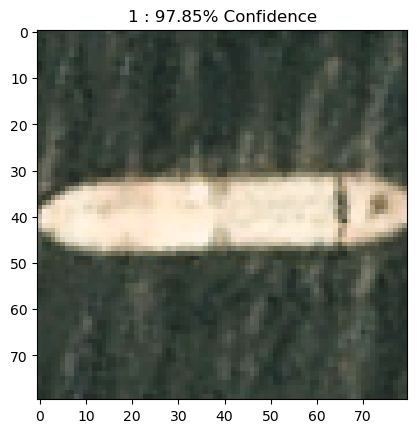

In [17]:
plt.figure()
plt.imshow(examples[5])
confidence = model(np.reshape(examples[0],[1,80,80,3])).numpy()[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

In [18]:
def create_adversarial_pattern(model,input_example, target,loss_object):
    input_example = tf.convert_to_tensor(input_example)
    with tf.GradientTape() as tape:
        tape.watch(input_example)
        prediction = model(input_example)
        loss = loss_object(target, prediction)

        # Get the gradients of the loss w.r.t to the input example.
        gradient = tape.gradient(loss, input_example)
        # Get the sign of the gradients to create the perturbation
        signed_grad = tf.sign(gradient)
    return signed_grad

In [19]:
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
signed_grad_np = create_adversarial_pattern(model,np.reshape(examples[5],[1,80,80,3]), np.array([[1,0]]),loss_object)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


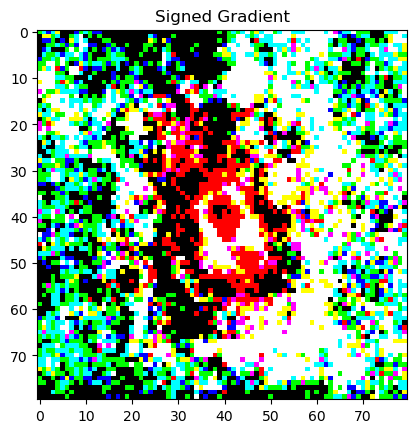

In [20]:
plt.figure()
plt.imshow(signed_grad_np[0])
plt.title('Signed Gradient')
plt.show()

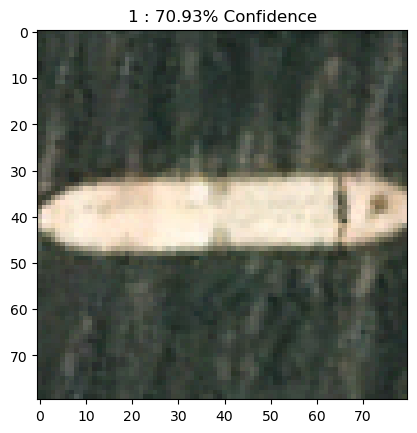

In [21]:
plt.figure()
adv_example = examples[5]-signed_grad_np[0]*0.01
plt.imshow(np.clip(adv_example,0,1))
confidence = model(np.reshape(adv_example,[1,80,80,3])).numpy()[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

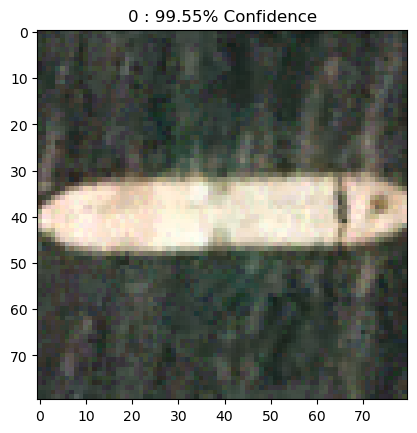

In [22]:
plt.figure()
adv_example = examples[5]-signed_grad_np[0]*0.03
plt.imshow(np.clip(adv_example,0,1))
confidence = model(np.reshape(adv_example,[1,80,80,3])).numpy()[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

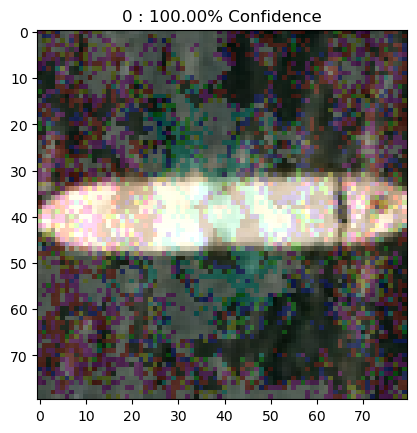

In [23]:
plt.figure()
adv_example = examples[5]-signed_grad_np[0]*0.1
plt.imshow(np.clip(adv_example,0,1))
confidence = model(np.reshape(adv_example,[1,80,80,3])).numpy()[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

2. Evaluate the Lipschitz constraind classification model on a test example and 0-targeted FGSM examples using epislons of 0.01, 0.03, and 0.1

In [25]:
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
signed_grad_np = create_adversarial_pattern(model_lip,np.reshape(examples[5],[1,80,80,3]), np.array([[1,0]]),loss_object)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


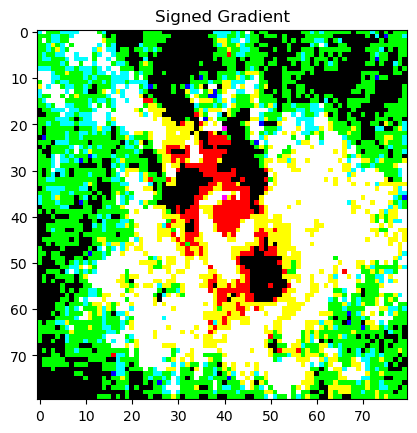

In [26]:
plt.figure()
plt.imshow(signed_grad_np[0])
plt.title('Signed Gradient')
plt.show()

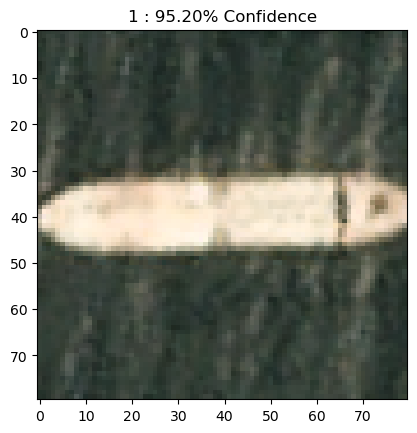

In [29]:
plt.figure()
plt.imshow(examples[5])
confidence = model_lip(np.reshape(examples[0],[1,80,80,3])).numpy()[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

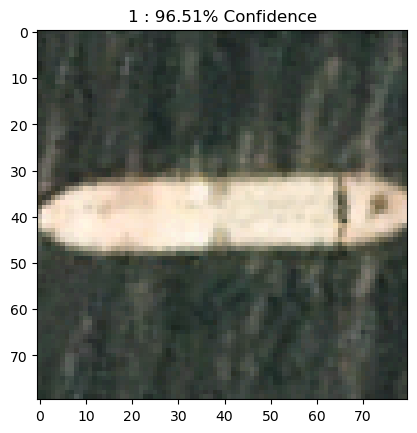

In [32]:
plt.figure()
adv_example = examples[5]-signed_grad_np[0]*0.01
plt.imshow(np.clip(adv_example,0,1))
confidence = model_lip(np.reshape(adv_example,[1,80,80,3])).numpy()[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

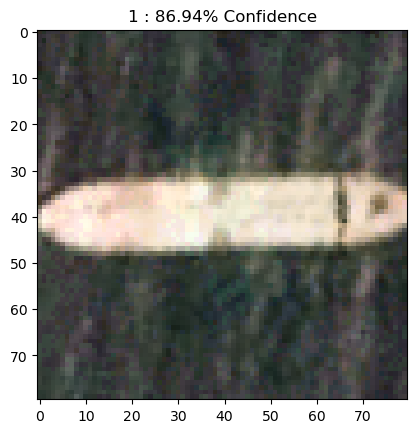

In [33]:
plt.figure()
adv_example = examples[5]-signed_grad_np[0]*0.03
plt.imshow(np.clip(adv_example,0,1))
confidence = model_lip(np.reshape(adv_example,[1,80,80,3])).numpy()[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

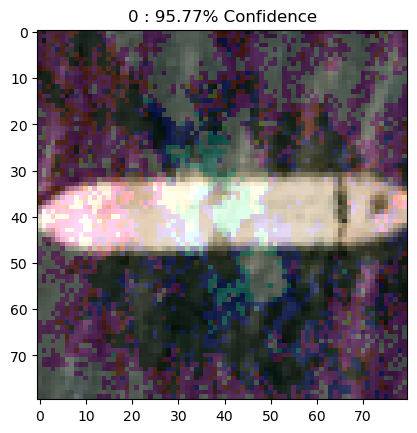

In [34]:
plt.figure()
adv_example = examples[5]-signed_grad_np[0]*0.1
plt.imshow(np.clip(adv_example,0,1))
confidence = model_lip(np.reshape(adv_example,[1,80,80,3])).numpy()[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()